In [62]:
import json 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [3]:
def extract_runs_from_json(results_json, runs_array): 
    extract = [x for x in results_json if x['run_name'] in runs_array]
    return extract

In [34]:
def aggregate_runs(results_json): 
    # adding in evaluation results. 
    # keep in mind that the evaluation distribution is evenly weighted. 
    agg = {}
    agg['loss'] = np.mean([x['loss'] for x in results_json])
    agg['test_wt_f1_score'] = np.mean([x['test_wt_f1_score'] for x in results_json])
    agg['val_wt_f1_score'] = np.mean([x['val_wt_f1_score'] for x in results_json])
    agg['test_accuracy'] = np.mean([x['test_accuracy'] for x in results_json])
    agg['val_accuracy'] = np.mean([x['val_accuracy'] for x in results_json])
    
    # adding in distributions. 
    train_dxns = [x['train_dxn'] for x in results_json]
    agg['train_dxn'] = np.mean(train_dxns, axis=0)
    test_dxns = [x['test_dxn'] for x in results_json]
    agg['test_dxn'] = np.mean(test_dxns, axis=0)
    valid_dxns = [x['valid_dxn'] for x in results_json]
    agg['valid_dxn'] = np.mean(valid_dxns, axis=0)
    
    eval_json = {}
    taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
    for tau in taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x['evaluation'][str(tau)]['mean_f1'] for x in results_json])
        
        class_f1s = [x['evaluation'][str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        precisions = [x['evaluation'][str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(precisions, axis=0)
        
        recalls = [x['evaluation'][str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(recalls, axis=0)
    agg['eval'] = eval_json
    return agg 

# -------------------------------------------------

In [25]:
pwd

'/Users/taesoodaniellee/Documents/heaviside/multiclass_src/notebooks'

In [45]:
results_path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results/old_runs"
output_file = "threshold_training_1128.json"
fp = "/".join([results_path, output_file])
with open(fp, "r+") as f: 
    results = json.load(f)
    print(len(results))

49


In [46]:
run_list = [x['run_name'] for x in results if 'run_name' in x]

In [47]:
sorted(run_list)

['1024-approx-f1-imb-tau_0.1-0',
 '1024-approx-f1-imb-tau_0.2-0',
 '1024-approx-f1-imb-tau_0.2-1',
 '1024-approx-f1-imb-tau_0.2-2',
 '1024-approx-f1-imb-tau_0.2-3',
 '1024-approx-f1-imb-tau_0.2-4',
 '1024-approx-f1-imb-tau_0.3-0',
 '1024-approx-f1-imb-tau_0.3-1',
 '1024-approx-f1-imb-tau_0.3-2',
 '1024-approx-f1-imb-tau_0.3-3',
 '1024-approx-f1-imb-tau_0.5-0',
 '1024-approx-f1-imb-tau_0.5-1',
 '1024-approx-f1-imb-tau_0.5-2',
 '1024-approx-f1-imb-tau_0.5-3',
 '1024-approx-f1-imb-tau_0.5-4',
 '1024-approx-f1-imb-tau_0.7-0',
 '1024-approx-f1-reg-tau_0.1-0',
 '1024-approx-f1-reg-tau_0.1-1',
 '1024-approx-f1-reg-tau_0.1-2',
 '1024-approx-f1-reg-tau_0.1-3',
 '1024-approx-f1-reg-tau_0.1-4',
 '1024-approx-f1-reg-tau_0.2-0',
 '1024-approx-f1-reg-tau_0.2-1',
 '1024-approx-f1-reg-tau_0.2-2',
 '1024-approx-f1-reg-tau_0.2-3',
 '1024-approx-f1-reg-tau_0.2-4',
 '1024-approx-f1-reg-tau_0.3-0',
 '1024-approx-f1-reg-tau_0.3-1',
 '1024-approx-f1-reg-tau_0.3-2',
 '1024-approx-f1-reg-tau_0.3-3',
 '1024-app

In [48]:
# look at precisions for each trained threshold 

In [49]:
approx_results_trained_on_0_1 = ['1024-approx-f1-imb-tau_0.1-0', 'run2_1024-approx-f1-imb-tau_0.1-1', 
 'run2_1024-approx-f1-imb-tau_0.1-2', 'run2_1024-approx-f1-imb-tau_0.1-3']
ce_results_trained_on_0_1 = ['1024-approx-f1-reg-tau_0.1-0',
 '1024-approx-f1-reg-tau_0.1-1','1024-approx-f1-reg-tau_0.1-2']

In [50]:
approx_results_trained_on_0_2 = ['1024-approx-f1-imb-tau_0.2-0',
 '1024-approx-f1-imb-tau_0.2-1',
 '1024-approx-f1-imb-tau_0.2-2',
 '1024-approx-f1-imb-tau_0.2-3',
 '1024-approx-f1-imb-tau_0.2-4']
ce_results_trained_on_0_2 = ['1024-approx-f1-reg-tau_0.2-0',
 '1024-approx-f1-reg-tau_0.2-1',
 '1024-approx-f1-reg-tau_0.2-2',
 '1024-approx-f1-reg-tau_0.2-3',
 '1024-approx-f1-reg-tau_0.2-4',]

In [51]:
approx_results_trained_on_0_5 = ['1024-approx-f1-imb-tau_0.5-0',
 '1024-approx-f1-imb-tau_0.5-1',
 '1024-approx-f1-imb-tau_0.5-2',
 '1024-approx-f1-imb-tau_0.5-3',
 '1024-approx-f1-imb-tau_0.5-4']
ce_results_trained_on_0_5 = ['1024-approx-f1-reg-tau_0.5-0',
 '1024-approx-f1-reg-tau_0.5-1',
 '1024-approx-f1-reg-tau_0.5-2',
 '1024-approx-f1-reg-tau_0.5-3',
 '1024-approx-f1-reg-tau_0.5-4',]

In [52]:
approx_results_0_1 = extract_runs_from_json(results, approx_results_trained_on_0_1)
ce_results_0_1 = extract_runs_from_json(results, ce_results_trained_on_0_1)

approx_results_0_1_agg = aggregate_runs(approx_results_0_1)
ce_results_0_1_agg = aggregate_runs(ce_results_0_1)

In [54]:
approx_results_0_2 = extract_runs_from_json(results, approx_results_trained_on_0_2)
ce_results_0_2 = extract_runs_from_json(results, ce_results_trained_on_0_2)

approx_results_0_2_agg = aggregate_runs(approx_results_0_2)
ce_results_0_2_agg = aggregate_runs(ce_results_0_2)

In [55]:
approx_results_0_5 = extract_runs_from_json(results, approx_results_trained_on_0_5)
ce_results_0_5 = extract_runs_from_json(results, ce_results_trained_on_0_5)

approx_results_0_5_agg = aggregate_runs(approx_results_0_5)
ce_results_0_5_agg = aggregate_runs(ce_results_0_5)

In [56]:
approx_results_0_7 = extract_runs_from_json(results, approx_results_trained_on_0_7)
# ce_results_0_7 = extract_runs_from_json(results, ce_results_trained_on_0_7)

approx_results_0_7_agg = aggregate_runs(approx_results_0_7)
# ce_results_0_7_agg = aggregate_runs(ce_results_0_7)

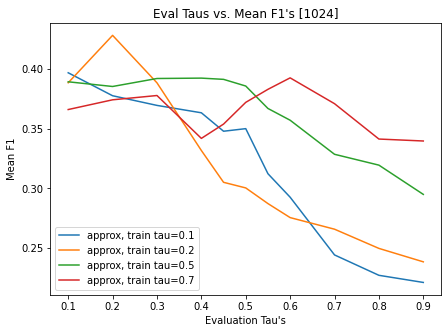

In [57]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
imb_eval_res = approx_results_0_1_agg['eval']
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in imb_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.1")

imb_eval_res = approx_results_0_2_agg['eval']
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in imb_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.2")

imb_eval_res = approx_results_0_5_agg['eval']
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in imb_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.5")

imb_eval_res = approx_results_0_7_agg['eval']
imb_mean_f1s = [imb_eval_res[x]['mean_f1'] for x in imb_eval_res]
plt.plot(taus, imb_mean_f1s, label="approx, train tau=0.7")


plt.title("Eval Taus vs. Mean F1's [1024]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
classes = [x for x in range(1, 11)]

In [59]:
def get_class_results(class_prec, class_recall, class_f1s, class_value): 
    class_val = class_value - 1
    for eval_tau in approx_results_0_1_agg['eval']:     
        class_prec[0].append(approx_results_0_1_agg['eval'][eval_tau]['class_precisions'][class_val])
        class_recall[0].append(approx_results_0_1_agg['eval'][eval_tau]['class_recalls'][class_val])
        class_f1s[0].append(approx_results_0_1_agg['eval'][eval_tau]['class_f1s'][class_val])

    for eval_tau in approx_results_0_2_agg['eval']:     
        class_prec[1].append(approx_results_0_2_agg['eval'][eval_tau]['class_precisions'][class_val])
        class_recall[1].append(approx_results_0_2_agg['eval'][eval_tau]['class_recalls'][class_val])
        class_f1s[1].append(approx_results_0_2_agg['eval'][eval_tau]['class_f1s'][class_val])

    for eval_tau in approx_results_0_5_agg['eval']:     
        class_prec[2].append(approx_results_0_5_agg['eval'][eval_tau]['class_precisions'][class_val])
        class_recall[2].append(approx_results_0_5_agg['eval'][eval_tau]['class_recalls'][class_val])
        class_f1s[2].append(approx_results_0_5_agg['eval'][eval_tau]['class_f1s'][class_val])

    for eval_tau in approx_results_0_7_agg['eval']:     
        class_prec[3].append(approx_results_0_7_agg['eval'][eval_tau]['class_precisions'][class_val])
        class_recall[3].append(approx_results_0_7_agg['eval'][eval_tau]['class_recalls'][class_val])
        class_f1s[3].append(approx_results_0_7_agg['eval'][eval_tau]['class_f1s'][class_val])
    return class_prec, class_recall, class_f1s

In [60]:
def plot_heatmap(class_recall, class_prec, class_f1, class_val):
    train_taus = [0.1, 0.2, 0.5, 0.7]
    eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
    ax = sns.heatmap(class_prec, annot=True)
    ax.set(xlabel="eval tau", ylabel="train tau")
    ax.set_xticklabels(eval_taus)
    ax.set_yticklabels(train_taus)
    plt.gcf().suptitle("Precision at different train taus: CLASS {}".format(class_val))
    plt.show()

    # recall 
    ax = sns.heatmap(class_recall, annot=True)
    ax.set(xlabel="eval tau", ylabel="train tau")
    ax.set_xticklabels(eval_taus)
    ax.set_yticklabels(train_taus)
    plt.gcf().suptitle("Recall at different train taus: CLASS {}".format(class_val))
    plt.show()

    # f1s 
    # recall 
    ax = sns.heatmap(class_f1, annot=True)
    ax.set(xlabel="eval tau", ylabel="train tau")
    ax.set_xticklabels(eval_taus)
    ax.set_yticklabels(train_taus)
    plt.gcf().suptitle("F1 at different train taus: CLASS {}".format(class_val))
    plt.show()

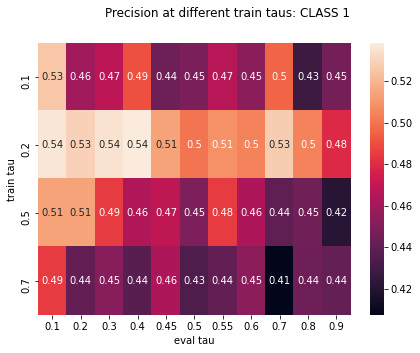

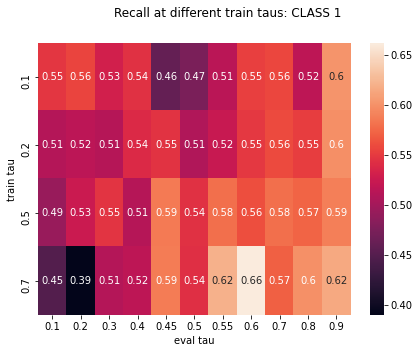

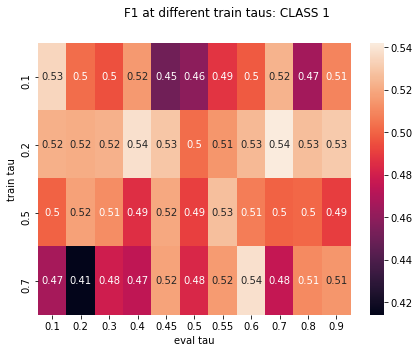

In [63]:
class_1_prec, class_1_recall, class_1_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_1_prec, class_1_recall, class_1_f1s = get_class_results(class_1_prec, class_1_recall, class_1_f1s, 1)
plot_heatmap(class_1_prec, class_1_recall, class_1_f1s, class_val=1)

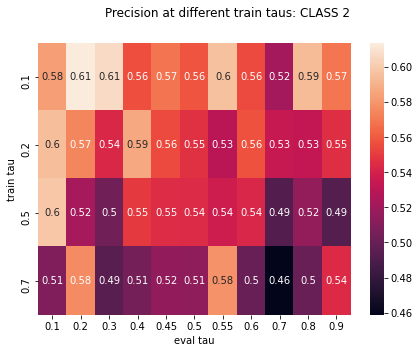

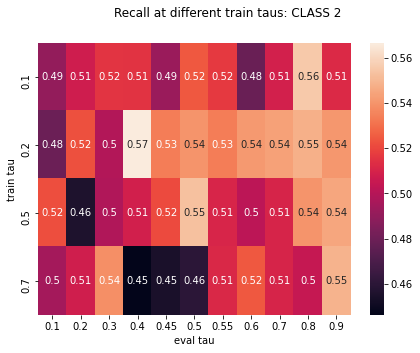

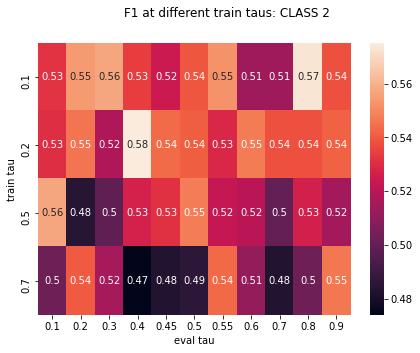

In [64]:
class_2_prec, class_2_recall, class_2_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_2_prec, class_2_recall, class_2_f1s = get_class_results(class_2_prec, class_2_recall, class_2_f1s, 2)
plot_heatmap(class_2_prec, class_2_recall, class_2_f1s, class_val=2)

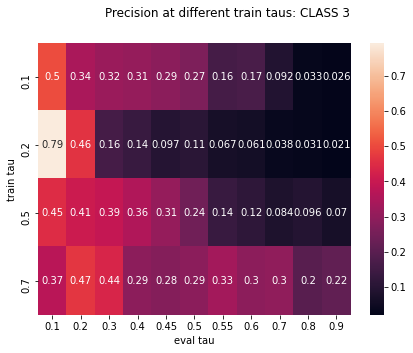

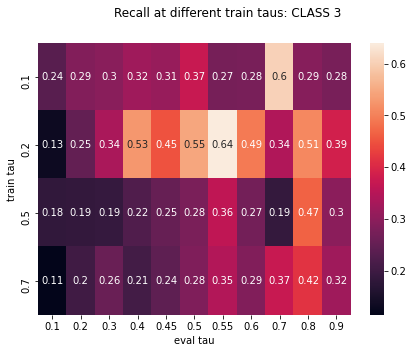

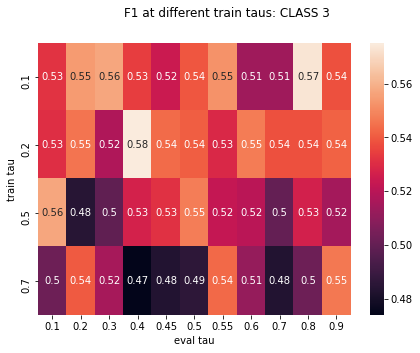

In [65]:
class_3_prec, class_3_recall, class_3_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_3_prec, class_3_recall, class_3_f1s = get_class_results(class_3_prec, class_3_recall, class_3_f1s, 3)
plot_heatmap(class_3_prec, class_3_recall, class_2_f1s, class_val=3)

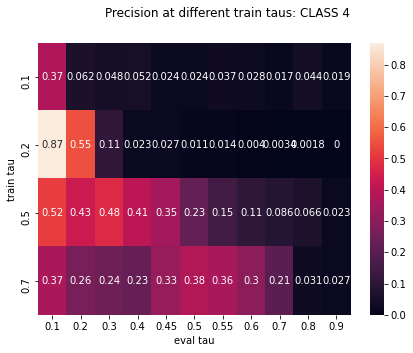

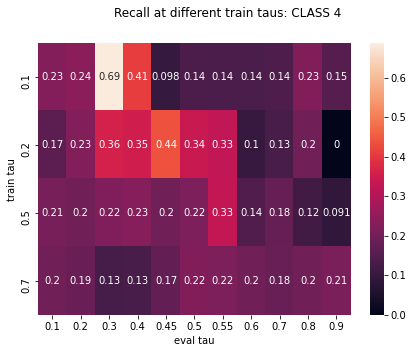

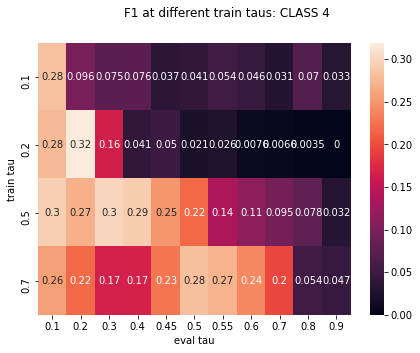

In [66]:
class_4_prec, class_4_recall, class_4_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_4_prec, class_4_recall, class_4_f1s = get_class_results(class_4_prec, class_4_recall, class_4_f1s, 4)
plot_heatmap(class_4_prec, class_4_recall, class_4_f1s, class_val=4)

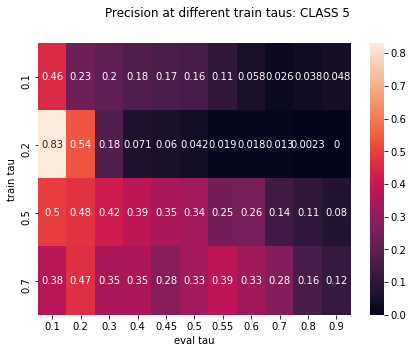

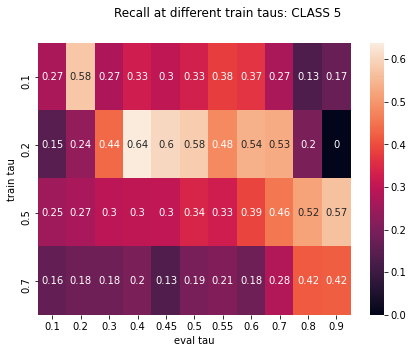

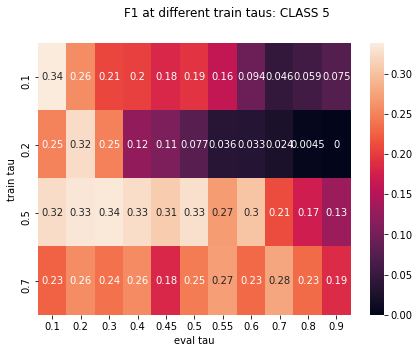

In [67]:
class_5_prec, class_5_recall, class_5_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_5_prec, class_5_recall, class_5_f1s = get_class_results(class_5_prec, class_5_recall, class_5_f1s, 5)
plot_heatmap(class_5_prec, class_5_recall, class_5_f1s, class_val=5)

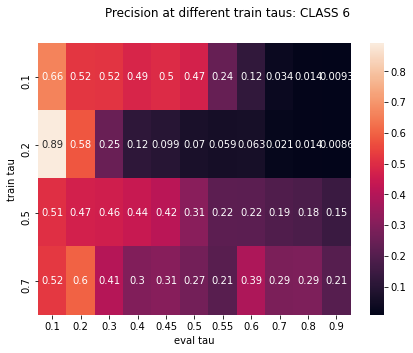

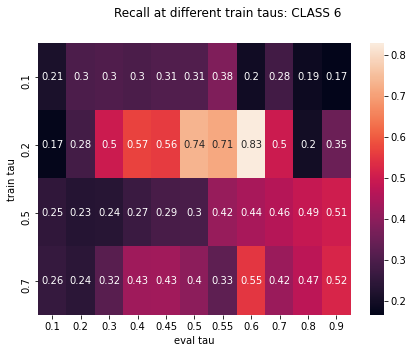

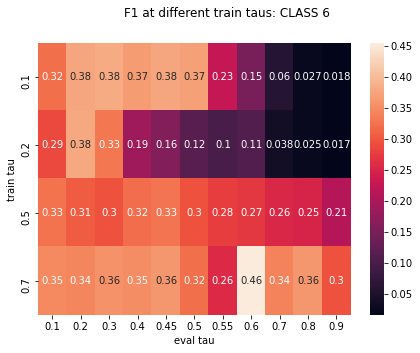

In [68]:
class_6_prec, class_6_recall, class_6_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_6_prec, class_6_recall, class_6_f1s = get_class_results(class_6_prec, class_6_recall, class_6_f1s, 6)
plot_heatmap(class_6_prec, class_6_recall, class_6_f1s, class_val=6)

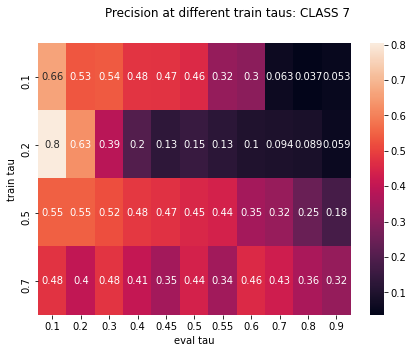

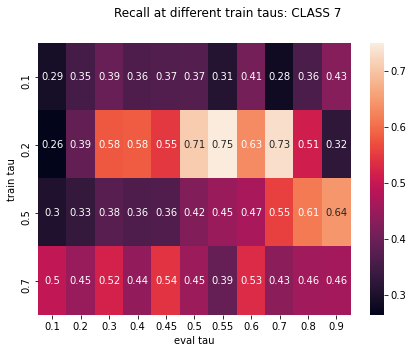

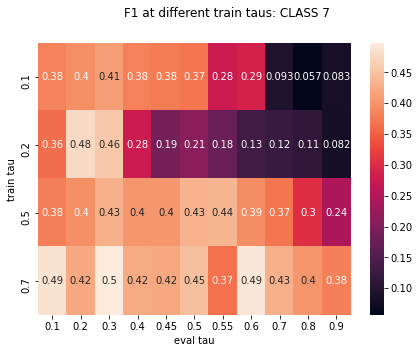

In [69]:
class_7_prec, class_7_recall, class_7_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_7_prec, class_7_recall, class_7_f1s = get_class_results(class_7_prec, class_7_recall, class_7_f1s, 7)
plot_heatmap(class_7_prec, class_7_recall, class_7_f1s, class_val=7)

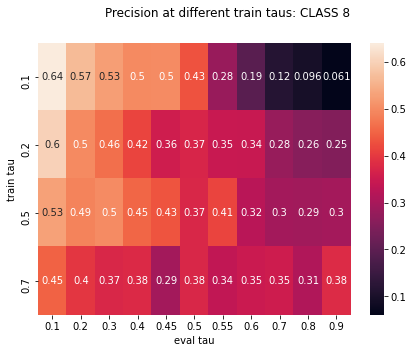

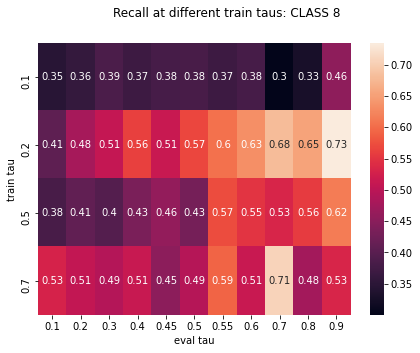

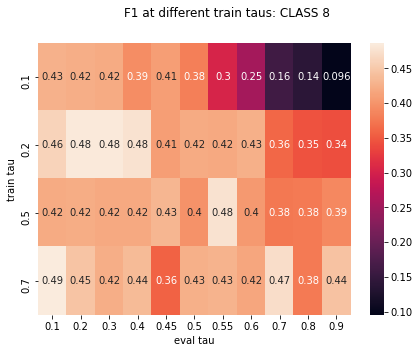

In [70]:
class_8_prec, class_8_recall, class_8_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_8_prec, class_8_recall, class_8_f1s = get_class_results(class_8_prec, class_8_recall, class_8_f1s, 8)
plot_heatmap(class_8_prec, class_8_recall, class_8_f1s, class_val=8)

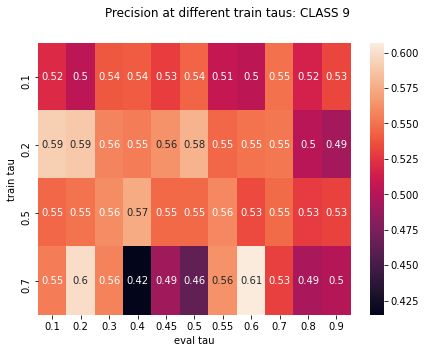

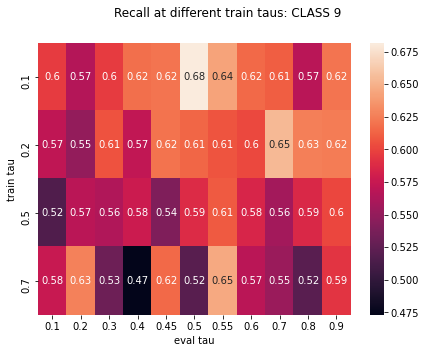

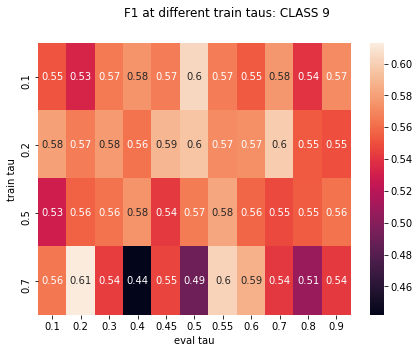

In [71]:
class_9_prec, class_9_recall, class_9_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_9_prec, class_9_recall, class_9_f1s = get_class_results(class_9_prec, class_9_recall, class_9_f1s, 9)
plot_heatmap(class_9_prec, class_9_recall, class_9_f1s, class_val=9)

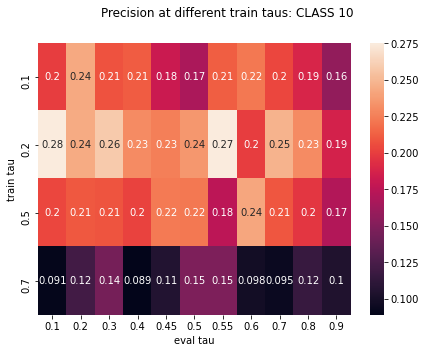

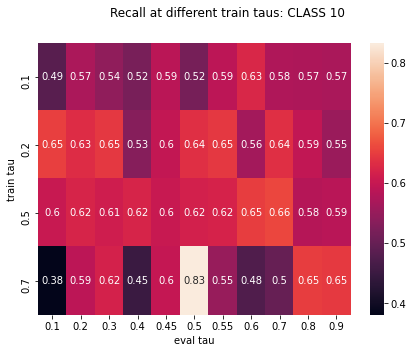

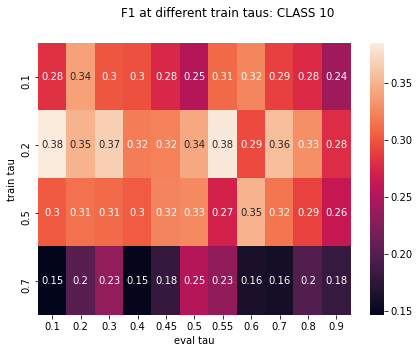

In [72]:
class_10_prec, class_10_recall, class_10_f1s = [[], [], [], []], [[], [], [], []],  [[], [], [], []]
class_10_prec, class_10_recall, class_10_f1s = get_class_results(class_10_prec, class_10_recall, class_10_f1s, 10)
plot_heatmap(class_10_prec, class_10_recall, class_10_f1s, class_val=10)